# Things to do!

+ Use Multiclass Dataset and use one-hot encoding on it.
+ Provide data set desc.
+ Normalize the data using minmax
+ Divide dataset into train and test and check for bias and variance.
+ Compare your model with logistic regression
+ Tune Hyperparameters and do analysis on it.

# Package imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

import L_layer_nn as lnn

# Dataset Init

Dataset chosen for analysis is [covtype](https://archive.ics.uci.edu/ml/datasets/covertype) dataset which defines 7 types of forest cover types each labeled a number from the set {1,2,3,4,5,6,7}.

The dataset contains _581,012_ observations from which: 
- first _11,340_ records used for training data subset
- next _3,780_ records used for validation data subset
- last _565,892_ records used for testing data subset

The dataset has 12 measures, but 54 columns of data (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)

|Name                                     |Data Type    |Measurement                       |Description|
|---|---|---|---|
|Elevation|quantitative|meters|Elevation in meters|
|Aspect|quantitative|azimuth|Aspect in degrees azimuth|
|Slope|quantitative|degrees|Slope in degrees|
|Horizontal_Distance_To_Hydrology        |quantitative    |meters                       |Horz Dist to nearest surface water features|
|Vertical_Distance_To_Hydrology          |quantitative    |meters                       |Vert Dist to nearest surface water features|
|Horizontal_Distance_To_Roadways         |quantitative    |meters                       |Horz Dist to nearest roadway|
|Hillshade_9am                           |quantitative    |0 to 255 index               |Hillshade index at 9am, summer solstice|
|Hillshade_Noon                          |quantitative    |0 to 255 index               |Hillshade index at noon, summer soltice|
|Hillshade_3pm                           |quantitative    |0 to 255 index               |Hillshade index at 3pm, summer solstice|
|Horizontal_Distance_To_Fire_Points      |quantitative    |meters                       |Horz Dist to nearest wildfire ignition points|
|Wilderness_Area (4 binary columns)      |qualitative     |0 (absence) or 1 (presence)  |Wilderness area designation|
|Soil_Type (40 binary columns)           |qualitative     |0 (absence) or 1 (presence)  |Soil Type designation|
|Cover_Type (7 types)                    |integer         |1 to 7                       |Forest Cover Type designation|

In [2]:
from sklearn.datasets import fetch_covtype
dataset = pd.read_csv("covtype.data")

In [3]:
dataset.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Unique labels by frequency
dataset['5'].value_counts().sort_values()

4      2747
5      9492
6     17367
7     20510
3     35754
1    211840
2    283301
Name: 5, dtype: int64

In [5]:
y = dataset.pop('5')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset))

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.360180,0.366667,0.090909,0.214746,0.204134,0.009414,0.905512,0.933071,0.551181,0.840792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Train - Test Split

from sklearn.cross_validation import train_test_split
X_train = dataset.iloc[0:11340,:]
y_train = y.iloc[0:11340]
X_test = dataset.iloc[11341:15121,:]
y_test = y.iloc[11341:15121]
#X_train, X_test, y_train, y_test = train_test_split(dataset, y, train_size=0.95, random_state=1)
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

The shape of X_train is: (11340, 54)
The shape of y_train is: (11340,)


/home/chrx/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Reshape for machine learning model

X_train = X_train.values
X_train = X_train.T
X_test = X_test.values
X_test = X_test.T

y_train = y_train.values
y_train = y_train.reshape(y_train.shape[0],1)
y_train = y_train.T

y_test = y_test.values
y_test = y_test.reshape(y_test.shape[0],1)
y_test = y_test.T

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (54, 11340)
The shape of y_train is: (1, 11340)
The shape of X_test is: (54, 3780)
The shape of y_test is: (1, 3780)


In [10]:
def oneHotEncoding(data, nb_classes):
    #targets = np.array(data).reshape(-1)
    data = data - 1
    return np.eye(nb_classes)[data]

In [11]:
temp = oneHotEncoding(y_train, 7)
temp = temp[0, :, :]
y_train = temp.T
print(y_train.shape)

temp = oneHotEncoding(y_test, 7)
temp = temp[0, :, :]
y_test = temp.T
print(y_test.shape)

(7, 11340)
(7, 3780)


# 2-layer Neural Network

# Training

Cost after iteration 100: 4.597978
Cost after iteration 200: 1.960661
Cost after iteration 300: 1.794682
Cost after iteration 400: 1.526177
Cost after iteration 500: 1.497008
Cost after iteration 600: 1.458232
Cost after iteration 700: 1.469558
Cost after iteration 800: 1.364838
Cost after iteration 900: 1.353929
Cost after iteration 1000: 1.325520
Cost after iteration 1100: 1.330859
Cost after iteration 1200: 1.360342
Cost after iteration 1300: 1.359492
Cost after iteration 1400: 1.287203
Cost after iteration 1500: 1.363588
Cost after iteration 1600: 1.290914
Cost after iteration 1700: 1.239287
Cost after iteration 1800: 1.333375
Cost after iteration 1900: 1.243412
Cost after iteration 2000: 1.295531
Cost after iteration 2100: 1.207925
Cost after iteration 2200: 1.252650
Cost after iteration 2300: 1.194383
Cost after iteration 2400: 1.249238
Cost after iteration 2500: 1.196358
Cost after iteration 2600: 1.186103
Cost after iteration 2700: 1.201892
Cost after iteration 2800: 1.158982
C

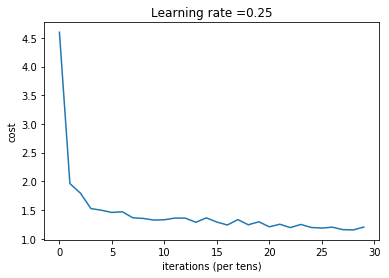

In [15]:
#Dimensions of each layer in our network
layer_dims = [X_train.shape[0],20,14,y_train.shape[0]]
activation_functions = ["relu","relu","sigmoid"]
alpha = 0.25
parameters = lnn.L_layer_model(X_train, y_train, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000, print_cost=True, print_plot =  True)

# Predictions and Accuracy

In [ ]:
activations = ["relu","relu","sigmoid"]
predictions = lnn.predict(parameters, X_test, activations)
print ('Accuracy: %d' % float((np.dot(y_test,predictions.T) + np.dot(1-y_test,1-predictions.T))/float(y_test.size)*100) + '%')

In [ ]:
activations = ["tanh","tanh","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

In [ ]:
activations = ["relu","tanh","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

In [ ]:
activations = ["tanh","relu","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')